In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

names = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'Class']
dataset = pd.read_csv('data/iris.data', names= names)
display(dataset)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_sacled = s.transform(X_test)

,sepal_len,sepal_width,petal_len,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
knn = KNeighborsClassifier(n_neighbors= 50)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_sacled)
print('acc: {}'.format(accuracy_score(y_test, y_pred)))

acc: 0.9333333333333333


In [3]:
k = 12
acc_arr = np.zeros(k)

for k in np.arange(1, k+1, 1):
    classifier = KNeighborsClassifier(n_neighbors= k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_arr[k - 1] = acc

max_acc = np.amax(acc_arr)

acc_list = list(acc_arr)
k = acc_list.index(max_acc)

print('k =', k + 1,', max_acc =', max_acc)

k = 1 , max_acc = 1.0


In [4]:
from sklearn import svm
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [5]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size= 0.6, random_state= 42)

svm_trainer = svm.SVC(kernel= 'linear', C= 1.0, gamma= 0.5)
svm_trainer.fit(X_train, y_train)
pred = svm_trainer.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print('acc = {0:f}'.format(score))

acc =, 0.988889


In [13]:
tree_df = pd.read_csv('data/titanic/train.csv', index_col= 'PassengerId')
display(tree_df.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# 결정 트리
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

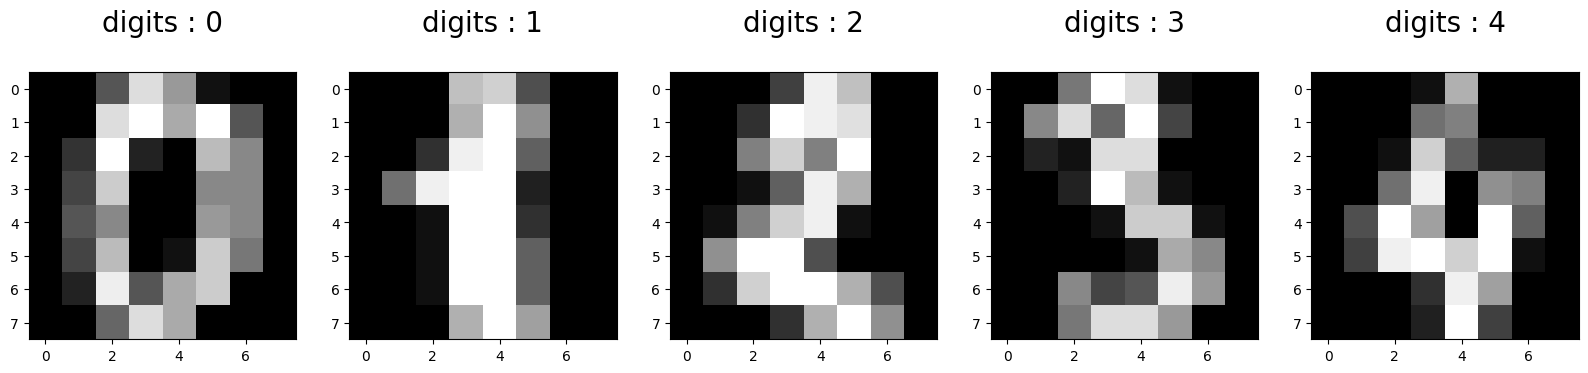

In [21]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()

plt.figure(figsize= (20, 4))
for index, (image, label) in enumerate(zip(digits.data[:5], digits.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap= plt.cm.gray)
    plt.title('digits : %i\n' % label, fontsize= 20)

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size= 0.25, random_state= 0)

logiRegr = LogisticRegression()
logiRegr.fit(x_train, y_train)

logiRegr.predict(x_test)
score = logiRegr.score(x_test, y_test)
print(score)

In [28]:
import seaborn as seabornInstance
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data_w = pd.read_csv('data/weather.csv')

X = data_w['MaxTemp'].values.reshape(-1, 1)
y = data_w['MinTemp'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# 선형회귀 학습 및 예측
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# 데이터프레임으로 확인
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predict' : y_pred.flatten()})
display(df)

,Actual,Predict
0,16.0,9.363566
1,0.9,1.935372
2,4.9,6.024286
3,16.8,12.839143
4,9.1,10.317646
...,...,...
69,6.3,1.185738
70,0.5,3.639086
71,-2.1,2.548709
72,13.8,15.973977


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


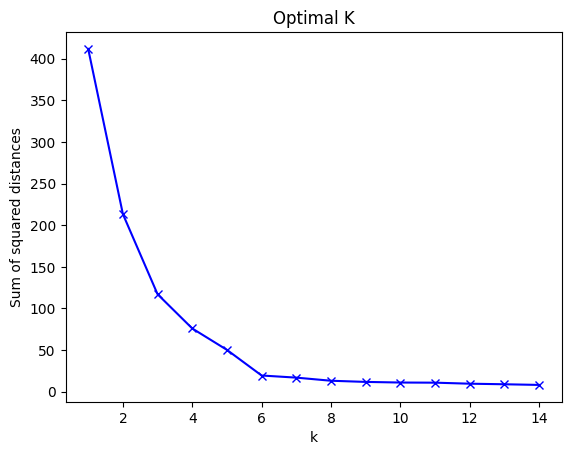

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

sales_data = pd.read_csv('data/sales data.csv')

# 범주형과 연속형으로 구분
categorical_features = ['Channel', 'Region'] 
continous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# 범주형 인코딩
for col in categorical_features:
    dummies = pd.get_dummies(sales_data[col], prefix= col)
    sales_data = pd.concat([sales_data, dummies], axis= 1)
    sales_data.drop(col, axis= 1, inplace= True)

display(sales_data.head())

mms = MinMaxScaler()
mms.fit(sales_data)
scaled_sales_data = mms.transform(sales_data)

# k에 따른 SSD
Sum_of_squared_distances = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters= k)
    km = km.fit(scaled_sales_data)
    Sum_of_squared_distances.append(km.inertia_)

# K에 따른 SSD 시각화
plt.plot(k_list, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal K')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

X = pd.read_csv('data/credit card.csv')
X = X.drop('CUST_ID', axis= 1)
X.fillna(method= 'ffill', inplace= True)
display(X.head())

ss = StandardScaler()
scaled_X = ss.fit_transform(X)

normalized_X = normalize(scaled_X)
normalized_X = pd.DataFrame(normalized_X)

pca = PCA(n_components= 2) # 2차원으로 축소
X_principal = pca.fit_transform(normalized_X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
display(X_principal.head())